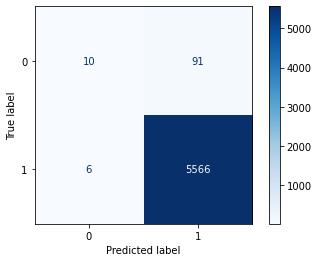

/data1/home/brooksch/.conda/envs/python3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/data1/home/brooksch/.conda/envs/python3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable

In [22]:
# datafile for modeling, will be checked with validation
datafile='/data0/power/LARC_Fairness.csv'

# a cheat to be refactored out
import sys
sys.path.append('..')
from transfer import validation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df=pd.read_csv(datafile)

validation.validate_data(df)
X,y=validation.prepare_outcomes(validation.prepare_one_hot(df))

from sklearn.impute import SimpleImputer
X=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(X)

model=LogisticRegression(n_jobs=-1)
model.fit(X,y)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X, y, cmap=plt.cm.Blues, normalize=None)